<img src="https://inhabitat.com/wp-content/blogs.dir/1/files/2018/04/Amazon-rainforest-gets-personhood.jpg" height=400 width=1300>

Here we will have a look at **raster** data through an application using data from NASA's Carbon Monitoring System (CMS) program. We will focus on the small municipality of Puerto Asís in the Colombian Amazon and look at changes in Landsat-derived landuse between 2002 and 2016. Data for this notebook were downloaded from NASA'S [EarthData](https://www.earthdata.nasa.gov/) library and hosted on [CyVerse](https://cyverse.org/) for cloud-based computing. If you would like to download the data for yourself you can access it here [https://daac.ornl.gov/cgi-bin/dsviewer.pl?ds_id=1783](https://daac.ornl.gov/cgi-bin/dsviewer.pl?ds_id=1783).


📚 You can read more about working with raster data and the `rioxarray` library here:
> * [Earth Data Science Textbook](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/fundamentals-raster-data/open-lidar-raster-python-xarray/)
> * [Rioxarray documentation](https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html)

In [ ]:
# Import Python libraries
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import earthpy.plot as ep
import rioxarray as rxr

## Working with **vector** data (.shp) to define the boundary

In [ ]:
# Define link to Colombia Municipalities shp url from
# (https://maps.princeton.edu/catalog/tufts-colombia-municipalities-11)

col_muni_url = ('https://maps.princeton.edu/download/file'
                '/tufts-colombia-municipalities-11-shapefile.zip')

# Open data using geopandas


In [ ]:
# Plot the geodataframe using Matplotlib


In [ ]:
# Select Putumayo Department, print the CRS, and call the data


In [ ]:
# Plot Putumayo using .plot()


In [ ]:
# Select Puerto Asís from Putumayo


In [ ]:
# NOTE: the following syntax also works to select/subset data


In [ ]:
# Plot Puerto Asís


## Opening and clipping **raster** data

In [ ]:
# Define url to 2002 raster data
raster_2002_url = ("https://data.cyverse.org/dav-anon/iplant/home/shared/"
                   "earthlab/geopark/landcover_colombian_amazon_2002.tif")

In [ ]:
# Define url to 2016 raster data
raster_2016_url = ("https://data.cyverse.org/dav-anon/iplant/home/shared/"
                   "earthlab/geopark/landcover_colombian_amazon_2016.tif")

In [ ]:
# Reproject Puerto Asís shp to same CRS as raster (EPSG:32618) and plot


In [ ]:
# Open and clip the 2002 raster data to the Puerto Asis boundary using rioxarray


In [ ]:
# Check CRS of the raster data


In [ ]:
# Open and clip the 2016 raster data to the Puerto Asis boundary using rioxarray


In [ ]:
# Plot the raster clipped to Puerto Asís (2002)


## Creating a categorical color map

In [ ]:
# Customizing the cmap (ChatGPT)
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm

# NOTE: Colors and landuses from the CMS User Guide:
# https://daac.ornl.gov/CMS/guides/Landcover_Colombian_Amazon.html

cms_colors = ['black',
              'forestgreen',
              'orange',
              'purple',
              'darkgoldenrod',
              'limegreen',
              'tab:blue',
              'yellow']

cms_cmap = ListedColormap(cms_colors)

In [ ]:
# Create a dummy array to map colors to
dummy_data = np.arange(8).reshape(1, -1)

# Plot the colorbar
plt.imshow(dummy_data, cmap=cms_cmap, aspect='auto', vmin=0, vmax=8)
plt.colorbar(ticks=np.arange(8))
plt.show()

In [ ]:
# Create custom labels ()

# Define labels
landuse_labels = ["Unclassified",
                  "Forest",
                  "Natural Grassland",
                  "Urban",
                  "Pasture",
                  "Secondary Forest",
                  "Water",
                  "Highly Reflective Surface"]

# Define bins
class_bins = [0,1,2,3,4,5,6,7,10]

# Define norm
norm = BoundaryNorm(class_bins,
                    len(cms_colors))

In [ ]:
# Creating the legend elements

from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], color='black', lw=18, label='Unclassified',),
                   Line2D([0], [0], color='forestgreen', lw=18, label='Forest'),
                   Line2D([0], [0], color='orange', lw=18, label='Natural Grassland'),
                   Line2D([0], [0], color='purple', lw=18, label='Urban'),
                   Line2D([0], [0], color='darkgoldenrod', lw=18, label='Pasture'),
                   Line2D([0], [0], color='limegreen', lw=18, label='Secondary Forest'),
                   Line2D([0], [0], color='tab:blue', lw=18, label='Water'),
                   Line2D([0], [0], color='yellow', lw=18, label='Highly Reflective Surface')]


## Plotting clipped **raster** data

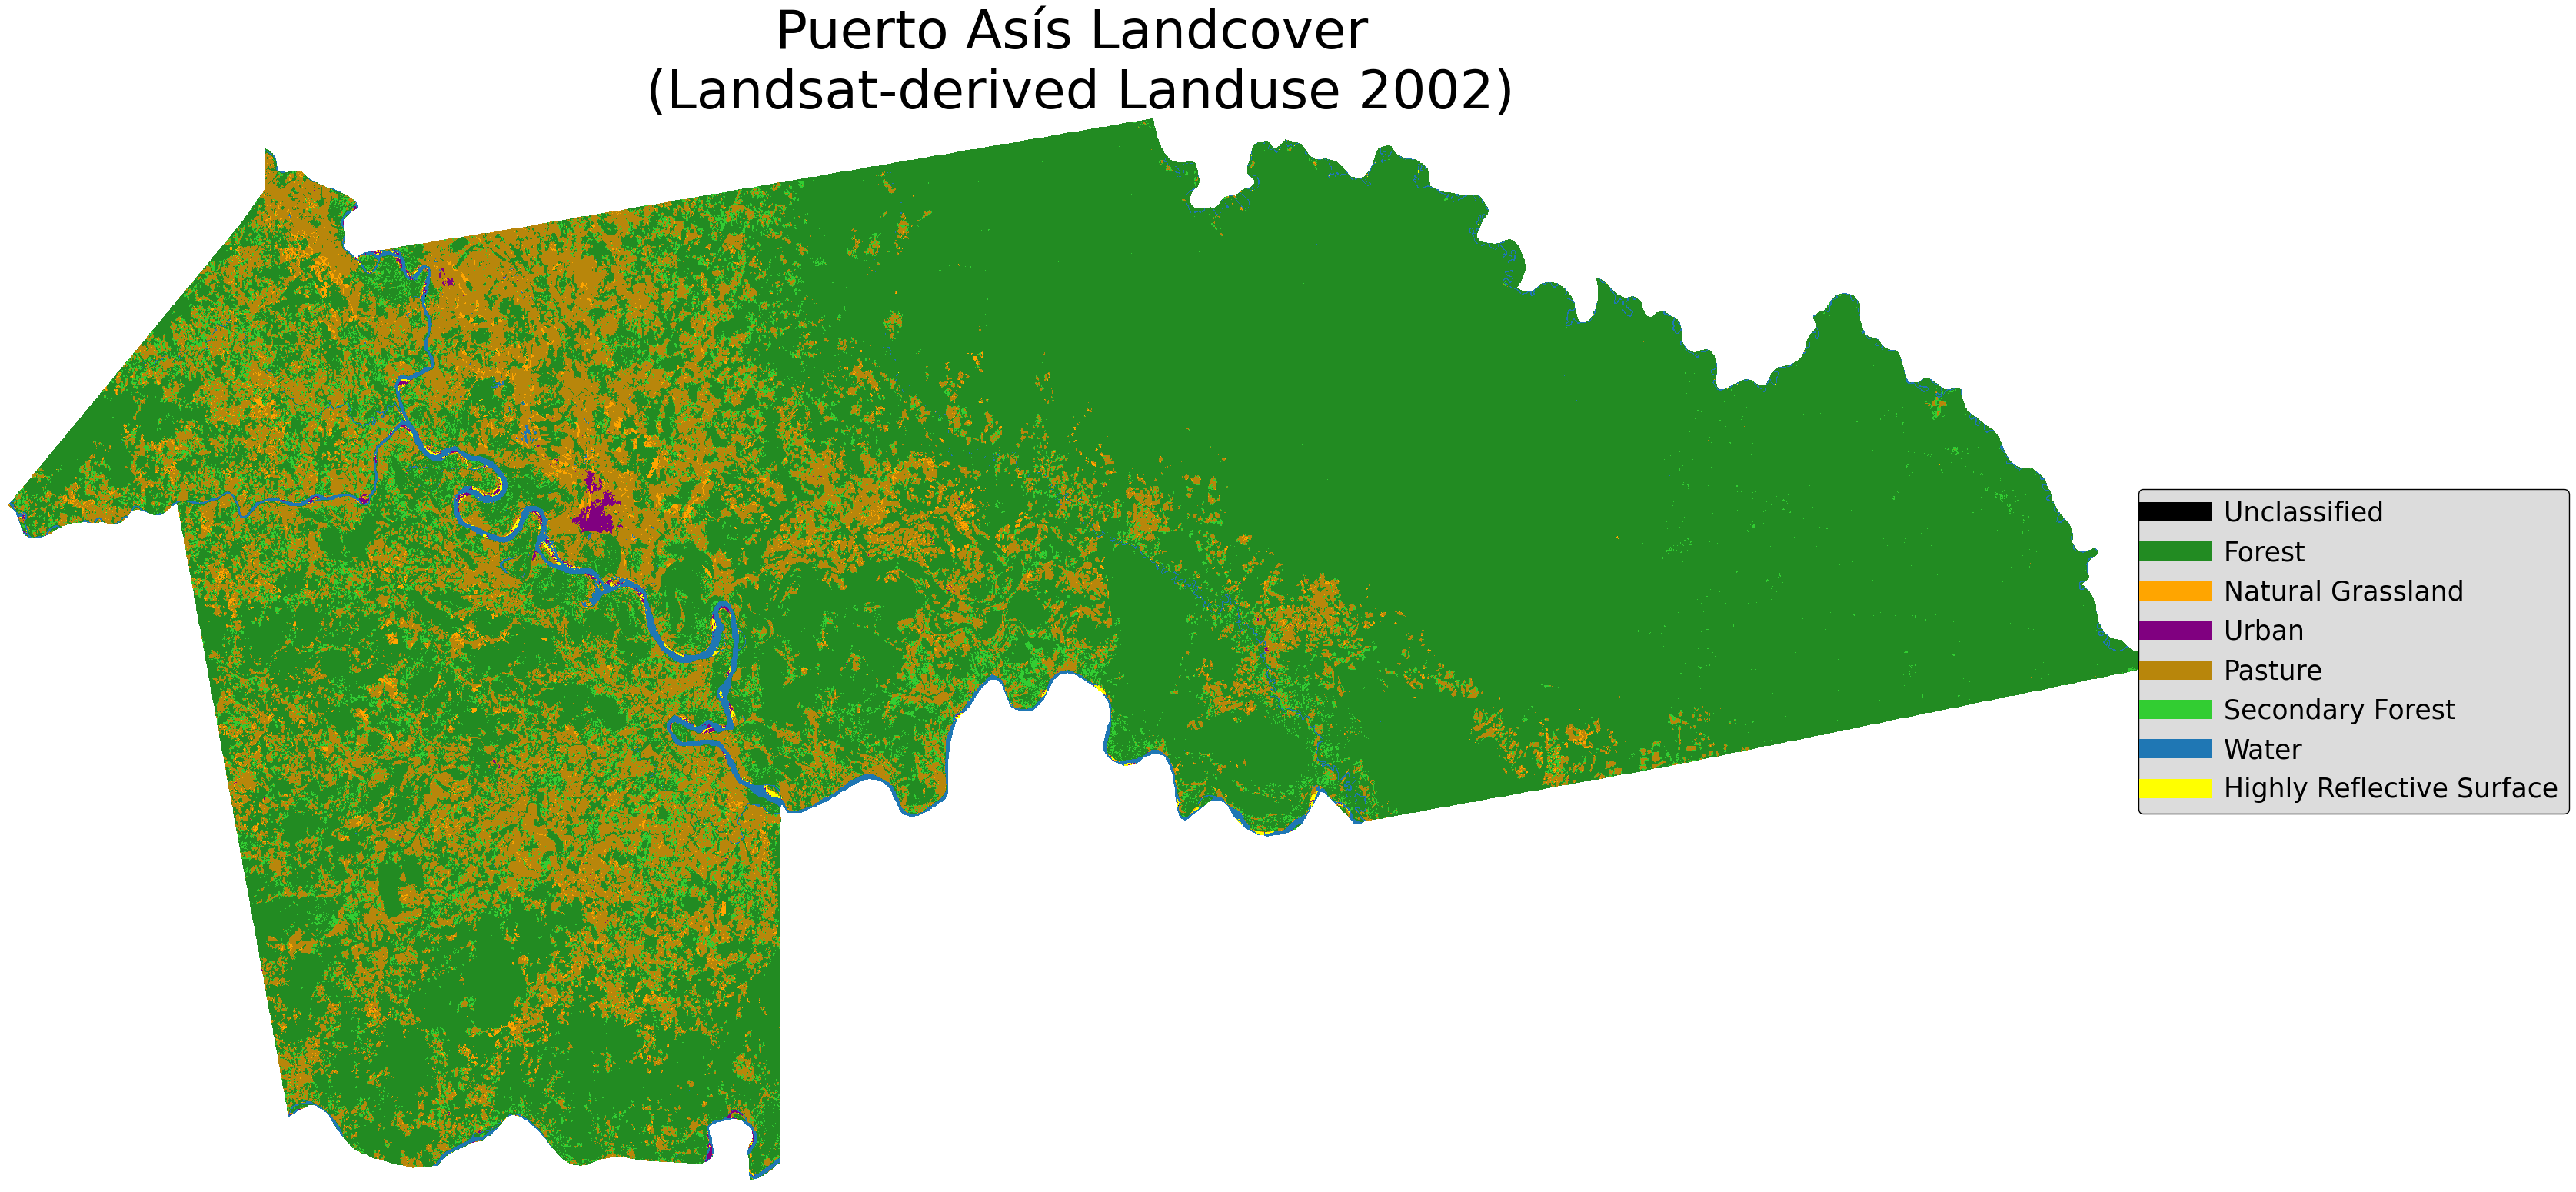

In [ ]:
# Plot the raster clipped to Puerto Asís (2002)

fig, ax = plt.subplots(figsize=(36,18))

clipped_2002.where(clipped_2002!=clipped_2002.rio.nodata).plot(
    ax=ax,
    add_colorbar=False,
    cmap=cms_cmap,
    norm=norm)
plt.title("Puerto Asís Landcover \n(Landsat-derived Landuse 2002)",fontsize=50)

ax.axis('off')

ax.legend(handles=legend_elements,
          loc='right',
          fontsize='25',
          facecolor='gainsboro',
          edgecolor='black',
          framealpha=1.0,
          bbox_to_anchor=(1.2, 0.5))

plt.show()

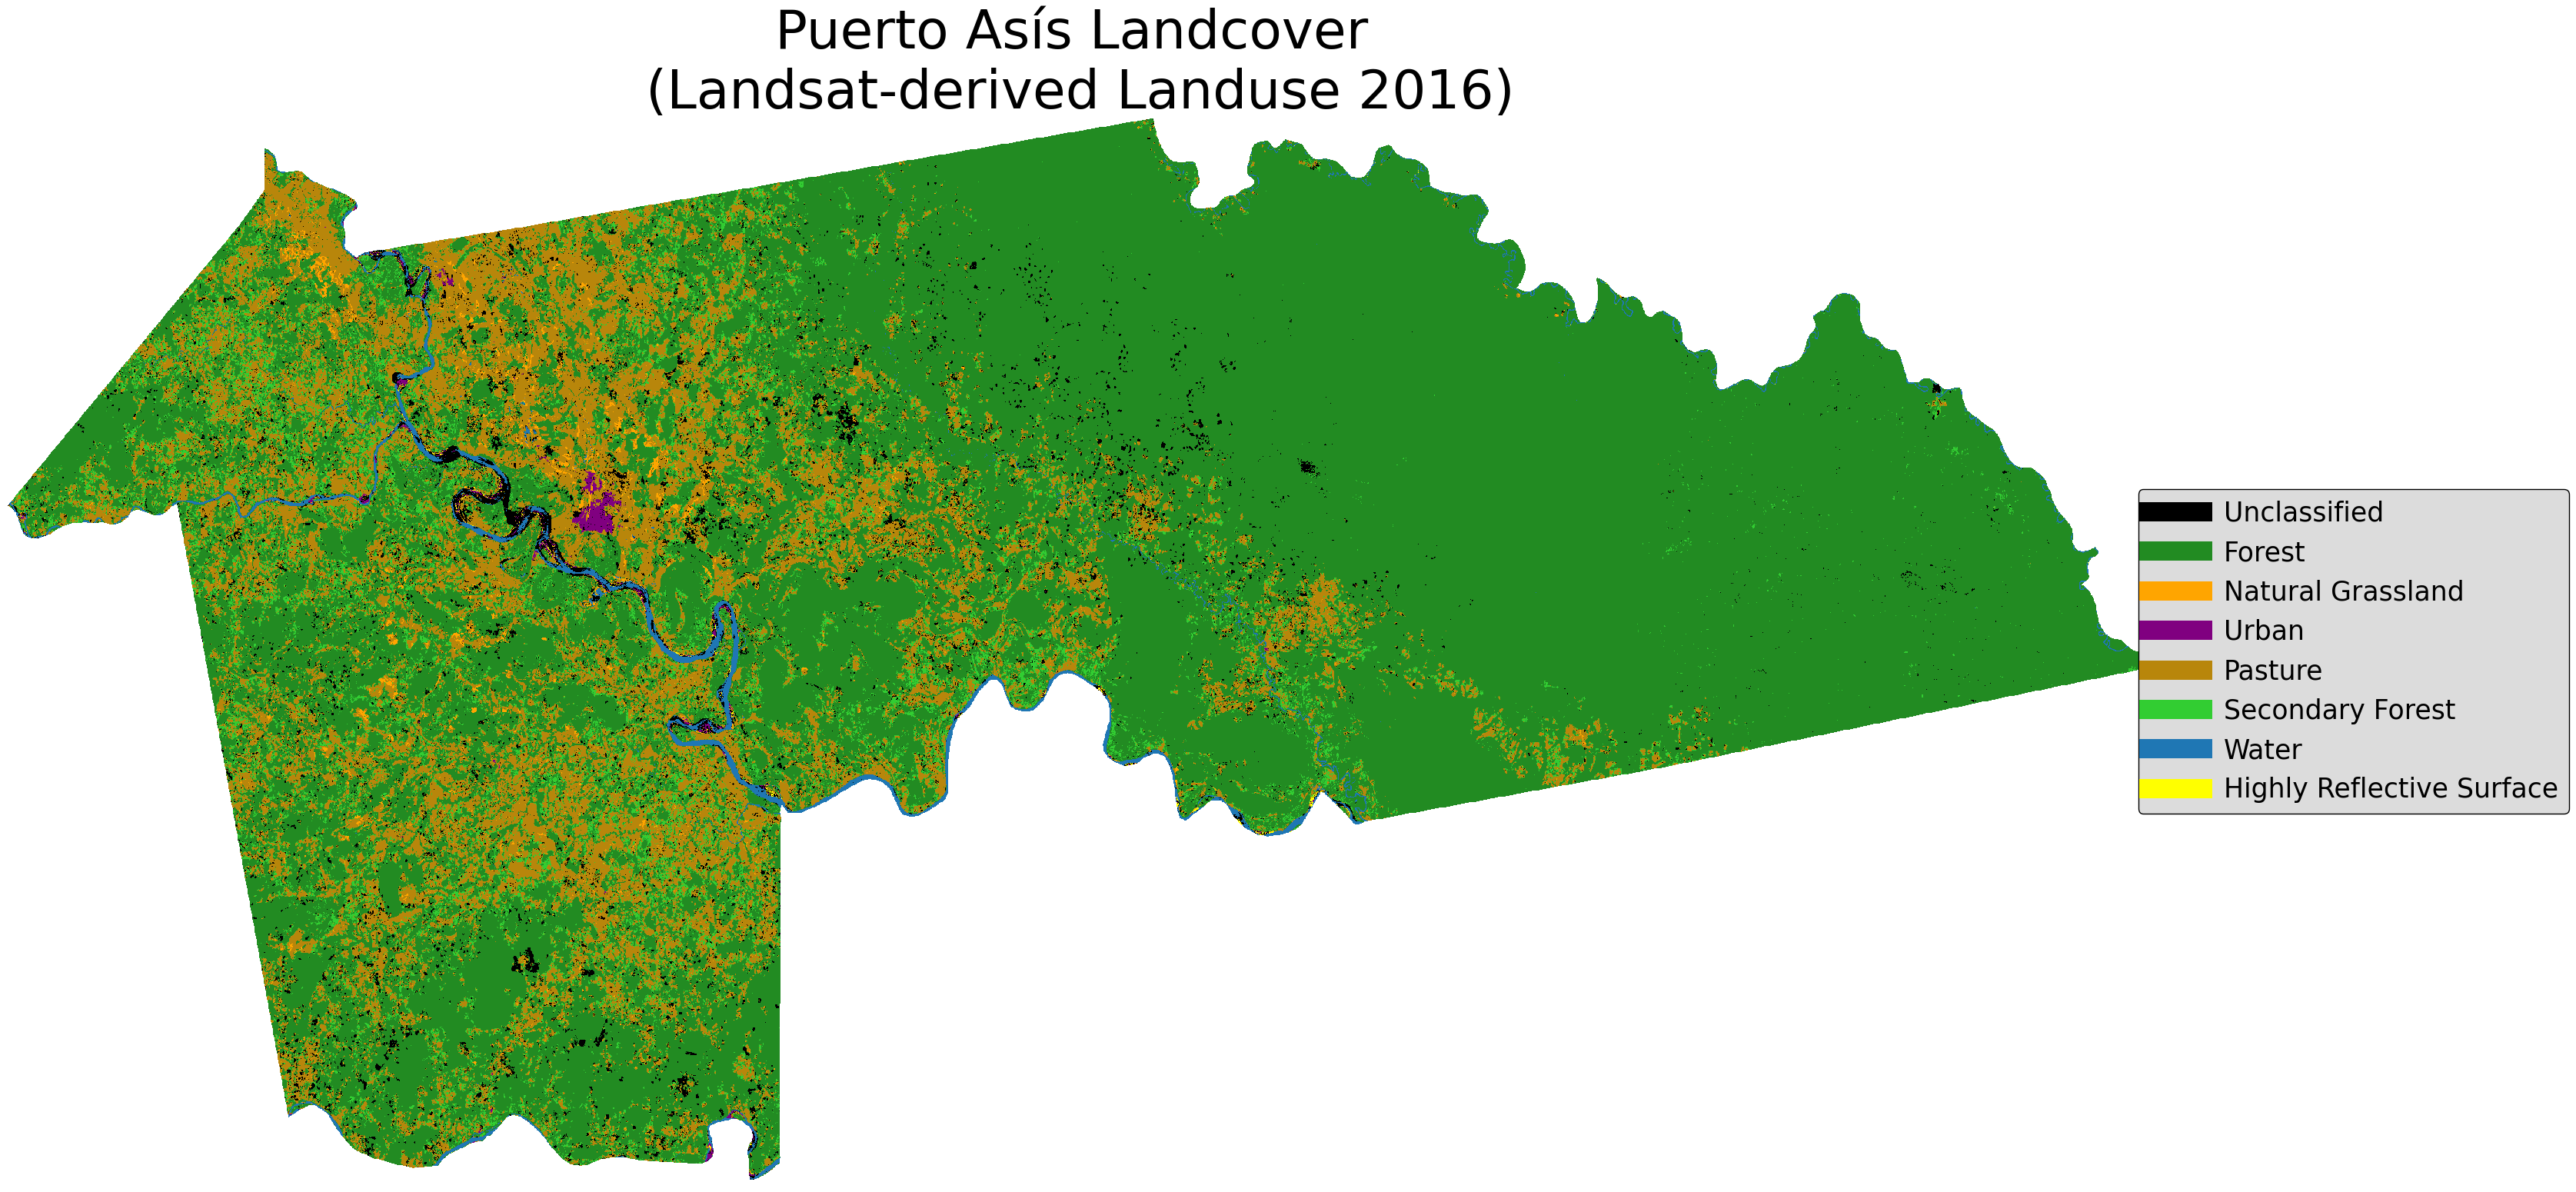

In [ ]:
# Plot the raster clipped to Puerto Asís (2016)

fig, ax = plt.subplots(figsize=(36,18))

clipped_2016.where(clipped_2016!=clipped_2016.rio.nodata).plot(
    ax=ax,
    add_colorbar=False,
    cmap=cms_cmap,
    norm=norm)
plt.title("Puerto Asís Landcover \n(Landsat-derived Landuse 2016)",fontsize=50)

ax.axis('off')

ax.legend(handles=legend_elements,
          loc='right',
          fontsize='25',
          facecolor='gainsboro',
          edgecolor='black',
          framealpha=1.0,
          bbox_to_anchor=(1.2, 0.5))

plt.show()

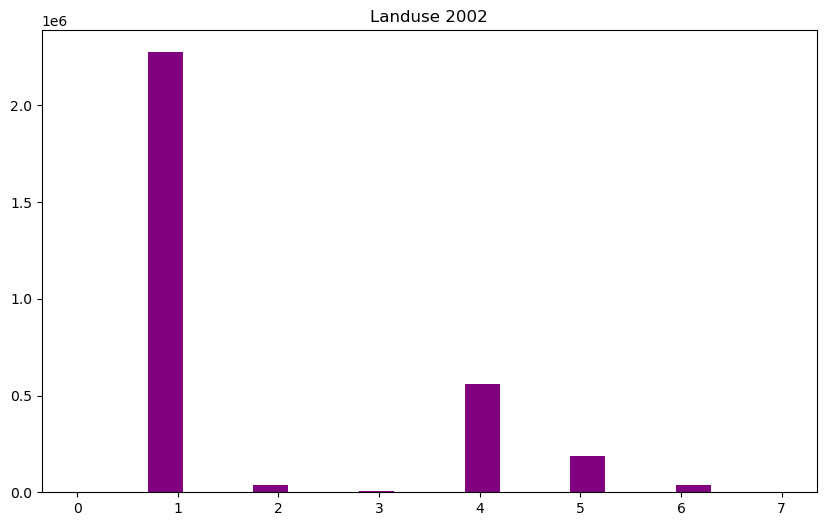

In [ ]:
# Creating histograms of 2002 pixel counts
ep.hist(clipped_2002.values, title='Landuse 2002', figsize=(10,6))
plt.show()

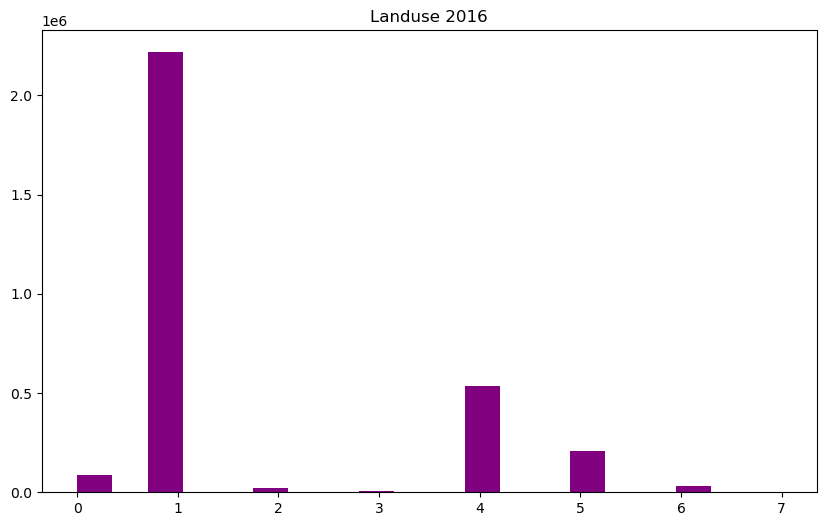

In [ ]:
# Creating histograms of 2016 pixel counts
ep.hist(clipped_2016.values, title='Landuse 2016', figsize=(10,6))
plt.show()

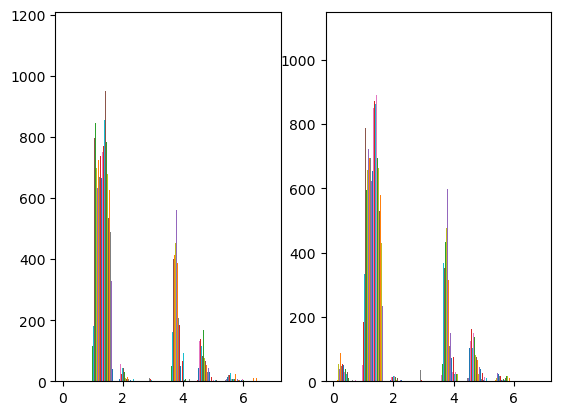

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True)
ax1.hist(clipped_2002.values, bins=8)
ax2.hist(clipped_2016.values, bins=8)
plt.show()